


Exploratary Data Analysis of  "Uber Pickups in the New York City - July 2014" 


### Details of the dataset:
##### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

Date/Time : The date and time of the Uber pickup<br>
Lat : The latitude of the Uber pickup<br>
Lon : The longitude of the Uber pickup<br>
Base : The TLC base company code affiliated with the Uber pickup<br>

**In this notebook only Date,Time analysis of Uber Pickups has been done.**

In [1]:
!pip3 -q install numpy pandas matplotlib seaborn geopy folium datetime scipy sklearn tensorflow keras

In [2]:


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import radians,cos,sin,asin,sqrt
import folium
import datetime


matplotlib.rcParams.update({'font.size': 12})

**Reading the uber dataset**

In [3]:
uber_data = pd.read_csv('uber-raw-data-jul14.csv')

In [4]:
# Print the first 10 elements
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [5]:
#print the type of data in Date/Time 
type(uber_data.loc[0,'Date/Time'])

str

**The type is str!. Let's  convert it to datetime format for easy indexing**

In [6]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

**Let us divide each hour in existing Date/Time column into four smaller bins of 15 mins each:**

**[0mins -15mins], [15mins - 30mins], [30mins - 45mins] and [45mins - 60mins]**

**This will allow us to visualize the time series more precisely.**

In [7]:
#create a new column to store this new binned column
uber_data['BinnedHour']=uber_data['Date/Time'].dt.floor('15min')

In [8]:
#printing the new column - BinnedHour
uber_data['BinnedHour']

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:15:00
                 ...        
796116   2014-07-31 23:15:00
796117   2014-07-31 23:15:00
796118   2014-07-31 23:15:00
796119   2014-07-31 23:30:00
796120   2014-07-31 23:45:00
Name: BinnedHour, Length: 796121, dtype: datetime64[ns]

### Visualizing the Dataset

**Let us visualize the total uber rides per day in the month of July 2014**

In [9]:
uber_data['BinnedHour'].dt.day.value_counts().sort_index()

1     21228
2     26480
3     21597
4     14148
5     10890
6     11443
7     18280
8     25763
9     27817
10    30541
11    28752
12    25936
13    21082
14    27350
15    33845
16    28607
17    30710
18    29860
19    25726
20    21212
21    23578
22    29029
23    34073
24    32050
25    29975
26    27708
27    22590
28    23981
29    27589
30    30740
31    33541
Name: BinnedHour, dtype: int64

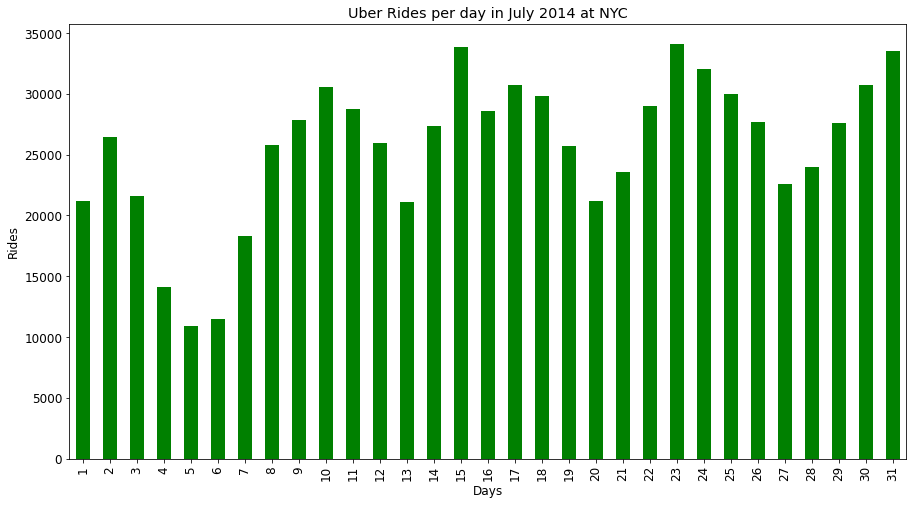

In [10]:
plt.figure(figsize=(15,8))
uber_data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Uber Rides per day in July 2014 at NYC')
plt.xlabel('Days')
_=plt.ylabel('Rides')

**Observe the nearly recurring pattern in the data!. It is very noticable after day 11.**

**Let us have a more closer look at it, say every 15 minutes from July 1 to July 31.**

In [11]:
uber_data['BinnedHour'].value_counts().sort_index()

2014-07-01 00:00:00     64
2014-07-01 00:15:00     54
2014-07-01 00:30:00     51
2014-07-01 00:45:00     47
2014-07-01 01:00:00     34
                      ... 
2014-07-31 22:45:00    417
2014-07-31 23:00:00    441
2014-07-31 23:15:00    331
2014-07-31 23:30:00    319
2014-07-31 23:45:00    291
Name: BinnedHour, Length: 2976, dtype: int64

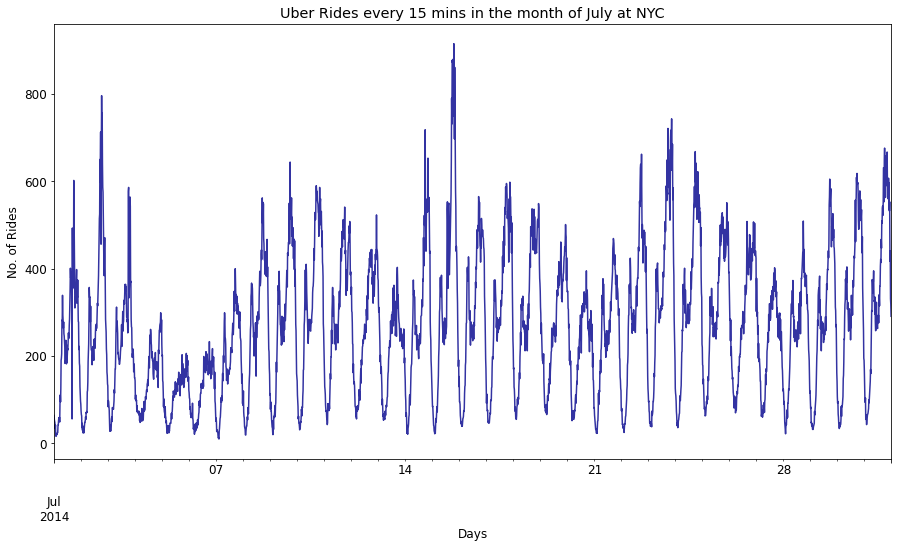

In [12]:
plt.figure(figsize=(15,8))
uber_data['BinnedHour'].value_counts().sort_index().plot(c='darkblue',alpha=0.8)
plt.title('Uber Rides every 15 mins in the month of July at NYC')
plt.xlabel('Days')
_=plt.ylabel('No. of Rides')

**The underlying trend is clearly visible now. It conveys that in a day there are times when the pickups are very low and very high, and they seem to follow a pattern.**

**Q) Which times correspond to the highest and lowest peaks in the plot above?**

In [13]:
uber_data['BinnedHour'].value_counts()

2014-07-15 19:15:00    915
2014-07-15 18:15:00    879
2014-07-15 17:45:00    877
2014-07-15 18:00:00    872
2014-07-15 20:00:00    861
                      ... 
2014-07-01 02:00:00     17
2014-07-07 01:45:00     15
2014-07-07 02:15:00     14
2014-07-07 02:00:00     12
2014-07-07 02:30:00     10
Name: BinnedHour, Length: 2976, dtype: int64

**The highest peak corresponds to the time 19:15(7:15 PM), 15th July 2014 and has a ride count of 915 and the lowest peak corresponds to the time 02:30, 7th July 2014 and has a ride count of 10**

**Now, Lets visualize the week wise trends in the data. For it, we have to map each date into its day name using a dictionary**

In [14]:
#defining a dictionary to map the weekday to day name
DayMap={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber_data['Day']=uber_data['BinnedHour'].dt.weekday.map(DayMap)

In [15]:
#Separating the date to another column
uber_data['Date']=uber_data['BinnedHour'].dt.date

In [16]:
#Defining ordered category of week days for easy sorting and visualization
uber_data['Day']=pd.Categorical(uber_data['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)

In [17]:
#Separating time from the "BinnedHour" Column
uber_data['Time']=uber_data['BinnedHour'].dt.time

In [18]:
uber_data

,Date/Time,Lat,Lon,Base,BinnedHour,Day,Date,Time
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00,Tuesday,2014-07-01,00:00:00
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00,Tuesday,2014-07-01,00:00:00
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00,Tuesday,2014-07-01,00:00:00
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00,Tuesday,2014-07-01,00:00:00
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00,Tuesday,2014-07-01,00:15:00
...,...,...,...,...,...,...,...,...
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764,2014-07-31 23:15:00,Thursday,2014-07-31,23:15:00
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764,2014-07-31 23:15:00,Thursday,2014-07-31,23:15:00
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764,2014-07-31 23:15:00,Thursday,2014-07-31,23:15:00
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764,2014-07-31 23:30:00,Thursday,2014-07-31,23:30:00


In [19]:
uber_data.groupby(['Date','Day','Time']).count().dropna()

Date/Time  Lat  Lon  Base  BinnedHour
Date       Day    Time                                           
2014-07-01 Monday 00:00:00          0    0    0     0           0
                  00:15:00          0    0    0     0           0
                  00:30:00          0    0    0     0           0
                  00:45:00          0    0    0     0           0
                  01:00:00          0    0    0     0           0
...                               ...  ...  ...   ...         ...
2014-07-31 Sunday 22:45:00          0    0    0     0           0
                  23:00:00          0    0    0     0           0
                  23:15:00          0    0    0     0           0
                  23:30:00          0    0    0     0           0
                  23:45:00          0    0    0     0           0

[20832 rows x 5 columns]

**Rearranging the dataset for weekly analysis**

In [20]:
weekly_data = uber_data.groupby(['Date','Day','Time']).count().dropna().rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(10)

,Date,Day,Time,Rides
0,2014-07-01,Monday,00:00:00,0
1,2014-07-01,Monday,00:15:00,0
2,2014-07-01,Monday,00:30:00,0
3,2014-07-01,Monday,00:45:00,0
4,2014-07-01,Monday,01:00:00,0
5,2014-07-01,Monday,01:15:00,0
6,2014-07-01,Monday,01:30:00,0
7,2014-07-01,Monday,01:45:00,0
8,2014-07-01,Monday,02:00:00,0
9,2014-07-01,Monday,02:15:00,0


**Grouping weekly_data by days to plot total rides per week in july 2014.**

In [21]:
#Grouping the weekly_data daywise
daywise = weekly_data.groupby('Day').sum()
daywise

,Rides
Day,
Monday,93189
Tuesday,137454
Wednesday,147717
Thursday,148439
Friday,102735
Saturday,90260
Sunday,76327


Text(0.5, 1.0, 'Total Rides by week day in July 2014 at NYC')

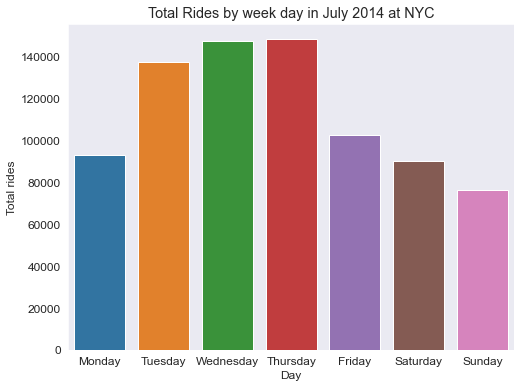

In [22]:
sns.set_style("dark")
plt.figure(figsize=(8,6))
ax=sns.barplot(x = daywise.index,y=daywise.Rides,)
plt.ylabel('Total rides')
plt.title('Total Rides by week day in July 2014 at NYC')

**According to the bar plot above, rides are maximum on Thursdays and minimum on Sundays. Sundays having the lowest number of rides makes sense logically, as it's a holiday and people often take rest on that day.**

In [28]:
weekly_data = weekly_data.groupby(['Day','Time']).mean()
weekly_data.head(10)

Day     Time    
Monday  00:00:00    13.225806
        00:15:00    10.967742
        00:30:00     8.741935
        00:45:00     7.709677
        01:00:00     6.935484
        01:15:00     5.354839
        01:30:00     3.838710
        01:45:00     3.645161
        02:00:00     2.612903
        02:15:00     3.161290
Name: Rides, dtype: float64

In [29]:
#Unstacking the data to create heatmap
weekly_data= weekly_data.unstack(level=0)
weekly_data

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
00:00:00,13.225806,14.129032,18.096774,21.032258,24.677419,40.258065,36.709677
00:15:00,10.967742,13.290323,13.741935,17.645161,19.870968,38.419355,37.129032
00:30:00,8.741935,11.967742,14.387097,16.612903,19.096774,33.096774,34.903226
00:45:00,7.709677,9.290323,10.967742,14.064516,15.709677,31.483871,31.903226
01:00:00,6.935484,7.870968,10.129032,12.354839,15.483871,29.129032,31.322581
...,...,...,...,...,...,...,...
22:45:00,24.903226,37.741935,48.354839,64.064516,58.096774,50.258065,26.322581
23:00:00,22.225806,35.290323,41.258065,58.193548,56.129032,48.000000,21.258065
23:15:00,19.645161,28.096774,36.096774,47.516129,48.935484,45.032258,18.870968


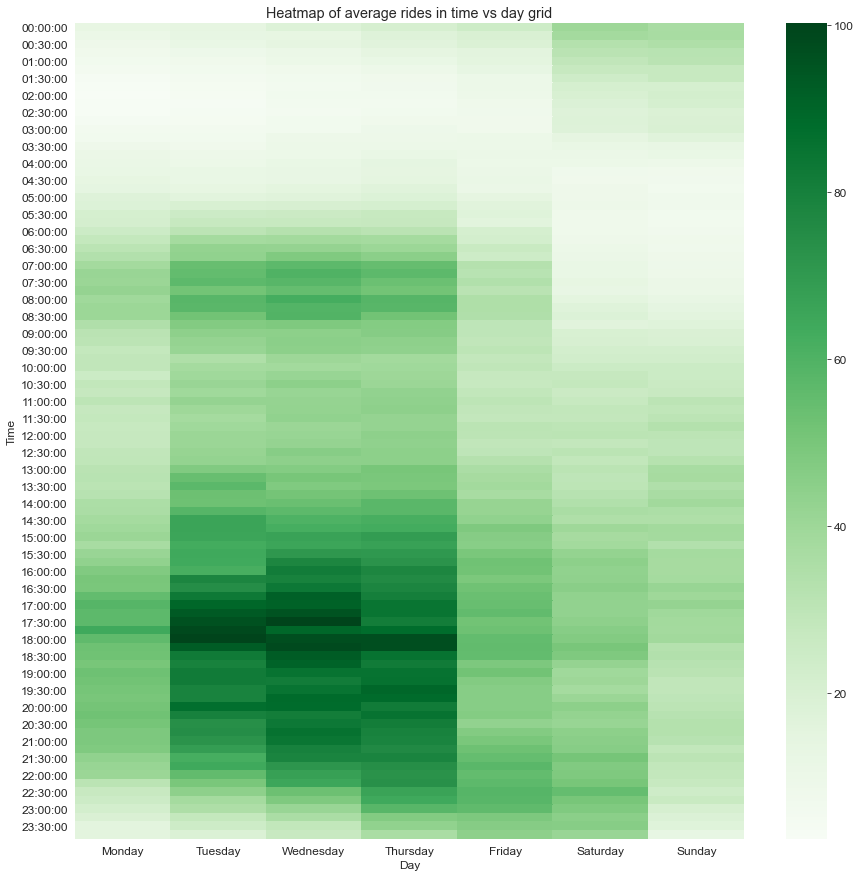

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(weekly_data,cmap='Greens')
_=plt.title('Heatmap of average rides in time vs day grid')

**The heatmap indicates that the maximum average uber rides occur around 5:30PM to 6:15PM on Wednesdays and Thursdays and their values fall between 550 to 620.**

**Here is another way of looking at it:**

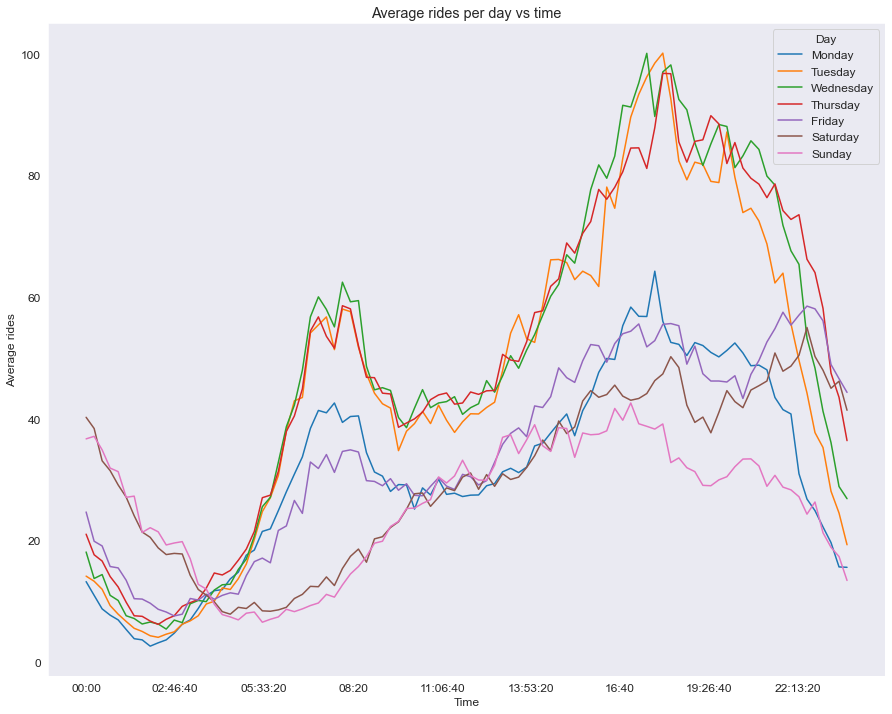

In [35]:
plt.figure(figsize=(15,12))
weekly_data.plot(ax=plt.gca())
_=plt.title('Average rides per day vs time')
_=plt.ylabel('Average rides')
plt.locator_params(axis='x', nbins=10)

**Finding average rides on any day**

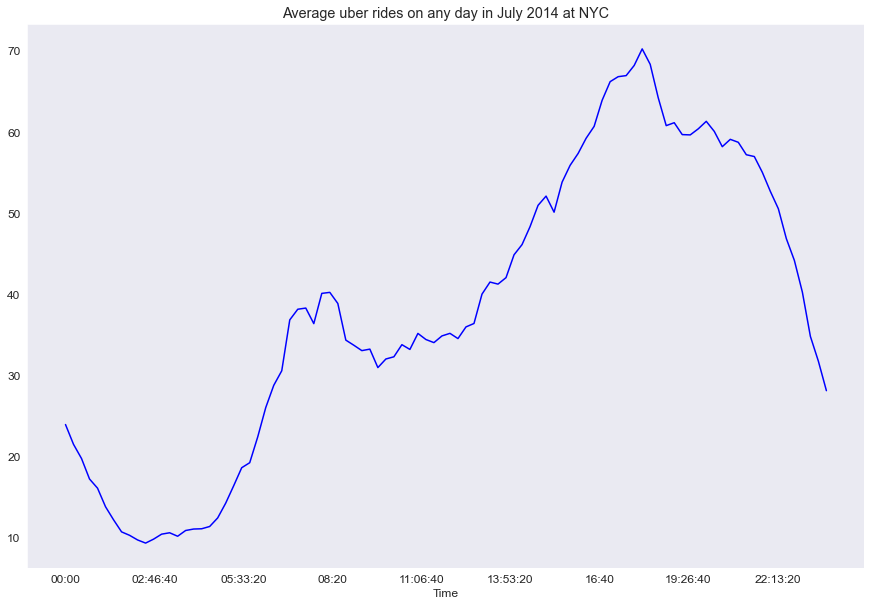

In [37]:
plt.figure(figsize=(15,10))
weekly_data.T.mean().plot(c = 'blUE')
_=plt.title('Average uber rides on any day in July 2014 at NYC')
plt.locator_params(axis='x', nbins=10)

**This plot further confirms that the average rides on any given day is lowest around 2 AM and highest in the around 5:30 PM.**

**Hence,this data analysis gives us insights about peak hours ,peak days about Uber Pickups in month of July.**

-------------------------------------------END--------------------------------------------------------------------